# Handling missing values

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
dataset = pd.read_csv(r'data\analytics vidhya\train_v9rqX0R.csv')

As observed in data analysis, there are two columns with missing values. 

'Item_Weight' has widely distributed values. Replacing missing values with mean.
'Outlet_Size' has only three categories. Replacing missing values with mode.


In [4]:
dataset['Item_Weight'] = dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean())
dataset['Outlet_Size'] = dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode()[0])

In [5]:
#Also Item-visibility column has lot of values as 0, which is nothing but NAn value. Hence replacing 0 values with mean.
mean_value = dataset['Item_Visibility'].mean(skipna=True)
dataset['Item_Visibility']=dataset.Item_Visibility.mask(dataset.Item_Visibility == 0,mean_value)

In [6]:
sum(dataset.isna().any())

0

In [7]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace('LF','Low Fat')
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace('low fat','Low Fat')

In [9]:
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace('reg','Regular')

# Handling Skew Data

In [10]:
dataset.skew().sort_values(ascending=False)

Item_Visibility              1.286877
Item_Outlet_Sales            1.177531
Item_MRP                     0.127202
Item_Weight                  0.090561
Outlet_Establishment_Year   -0.396641
dtype: float64

In [11]:
#As shown above Item_Outlet_Sales, Item_Visibility are highly skewed.Applying log transformation to normalise them

dataset['Item_Outlet_Sales'] = np.log(dataset['Item_Outlet_Sales'])
dataset['Item_Visibility'] = np.log(dataset['Item_Visibility'])


In [12]:
dataset.skew().sort_values(ascending=False)

Item_MRP                     0.127202
Item_Weight                  0.090561
Outlet_Establishment_Year   -0.396641
Item_Visibility             -0.484991
Item_Outlet_Sales           -0.887753
dtype: float64

array([[<AxesSubplot:title={'center':'Item_Outlet_Sales'}>]], dtype=object)

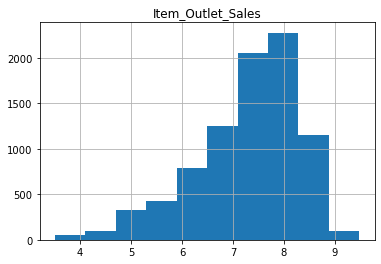

In [13]:
dataset.hist(column='Item_Outlet_Sales')


In [14]:
dataset['Item_Visibility'].value_counts(sort=True)

-2.716102    526
-2.564273      3
-1.992999      2
-2.516201      2
-2.560186      2
            ... 
-3.461519      1
-2.245911      1
-2.107319      1
-3.141017      1
-3.363732      1
Name: Item_Visibility, Length: 7880, dtype: int64

array([[<AxesSubplot:title={'center':'Item_Visibility'}>]], dtype=object)

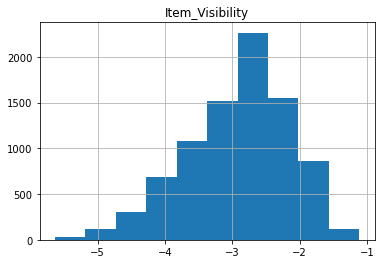

In [15]:
dataset.hist(column='Item_Visibility')

# Encoding Categorical features

In [16]:
#Dropping Item_identifier and Outlet_identifier columns 

df= dataset.copy()
df = df.drop(labels=['Item_Identifier','Outlet_Identifier'] ,axis=1 )

In [17]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,-4.132215,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,8.225540
1,5.92,Regular,-3.948780,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,6.094524
2,17.50,Low Fat,-4.088756,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,7.648392
3,19.20,Regular,-2.716102,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,6.596300
4,8.93,Low Fat,-2.716102,Household,53.8614,1987,High,Tier 3,Supermarket Type1,6.902446


In [18]:
df.shape

(8523, 10)

In [19]:
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

In [20]:
for col in categorical_features:
    print(col,':',df[col].nunique())

Item_Fat_Content : 2
Item_Type : 16
Outlet_Size : 3
Outlet_Location_Type : 3
Outlet_Type : 4


In [21]:
#Importing test dataset to compare number of categories

dataset_test = pd.read_csv(r'C:\Users\Praneeth Kalluri\Desktop\Manasa\analytics vidhya\test_AbJTz2l.csv')

In [22]:
df_test= dataset_test.copy()
df_test = df_test.drop(labels=['Item_Identifier','Outlet_Identifier'] ,axis=1 )

In [23]:
categorical_features_test = [feature for feature in df_test.columns if df_test[feature].dtype=='O']
for col in categorical_features_test:
    print(col,':',df[col].nunique())

Item_Fat_Content : 2
Item_Type : 16
Outlet_Size : 3
Outlet_Location_Type : 3
Outlet_Type : 4


In [24]:
#We can observe, train and test data has same number of categories for each categorical feature.

In [25]:
encode_data = pd.get_dummies(df[categorical_features],prefix=categorical_features)

In [26]:
encode_data

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
8519,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
8520,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
8521,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0


In [27]:
df.drop(categorical_features, axis=1, inplace = True)

In [28]:
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,-4.132215,249.8092,1999,8.225540
1,5.920,-3.948780,48.2692,2009,6.094524
2,17.500,-4.088756,141.6180,1999,7.648392
3,19.200,-2.716102,182.0950,1998,6.596300
4,8.930,-2.716102,53.8614,1987,6.902446
...,...,...,...,...,...
8518,6.865,-2.868511,214.5218,1987,7.929625
8519,8.380,-3.057982,108.1570,2002,6.308617
8520,10.600,-3.347099,85.1224,2004,7.084322
8521,7.210,-1.929501,103.1332,2009,7.520558


In [29]:
df_train = pd.concat([df, encode_data],axis=1)

In [30]:
df_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,-4.132215,249.8092,1999,8.225540,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,5.920,-3.948780,48.2692,2009,6.094524,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,17.500,-4.088756,141.6180,1999,7.648392,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,19.200,-2.716102,182.0950,1998,6.596300,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,8.930,-2.716102,53.8614,1987,6.902446,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,-2.868511,214.5218,1987,7.929625,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
8519,8.380,-3.057982,108.1570,2002,6.308617,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
8520,10.600,-3.347099,85.1224,2004,7.084322,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
8521,7.210,-1.929501,103.1332,2009,7.520558,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0


In [31]:
df_train.shape

(8523, 33)

In [32]:
x_train = df_train.drop(labels= ['Item_Outlet_Sales'], axis=1)
y_train = df_train['Item_Outlet_Sales']

In [33]:
x_train.shape

(8523, 32)

In [34]:
x_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,-4.132215,249.8092,1999,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,5.920,-3.948780,48.2692,2009,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,17.500,-4.088756,141.6180,1999,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,19.200,-2.716102,182.0950,1998,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,8.930,-2.716102,53.8614,1987,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,-2.868511,214.5218,1987,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
8519,8.380,-3.057982,108.1570,2002,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
8520,10.600,-3.347099,85.1224,2004,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
8521,7.210,-1.929501,103.1332,2009,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0


In [39]:
y_train

0       8.225540
1       6.094524
2       7.648392
3       6.596300
4       6.902446
          ...   
8518    7.929625
8519    6.308617
8520    7.084322
8521    7.520558
8522    6.640751
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# Scaling values using standard scaler

In [84]:
y_train = y_train.values.reshape(len(y_train),1)

In [85]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
sc_y = StandardScaler() 
y_train = sc_y.fit_transform(y_train)

In [86]:
x_train

array([[-0.84187169, -1.59432679,  1.74745381, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.64170589, -1.35444115, -1.48902325, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 1.09855449, -1.53749379,  0.01004021, ...,  0.72680189,
        -0.34955064, -0.35102831],
       ...,
       [-0.53424315, -0.56759906, -0.89720755, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.33644372,  1.28625282, -0.60797692, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 0.45963367, -0.24942827, -1.05226104, ...,  0.72680189,
        -0.34955064, -0.35102831]])

In [87]:
y_train

array([[ 0.91342716],
       [-1.18186738],
       [ 0.34595351],
       ...,
       [-0.20866123],
       [ 0.22026298],
       [-0.64479613]])

# Using XGBoost Model

In [88]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 69.92 %
Standard Deviation: 2.85 %


# Using Gradient boost

In [90]:
from sklearn import datasets, ensemble
reg = ensemble.GradientBoostingRegressor()
reg.fit(x_train, y_train)

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor()

In [91]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = reg, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

Accuracy: 73.54 %
Standard Deviation: 2.29 %


# Ridge Regression

In [92]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train,y_train)

Ridge(alpha=0.05, normalize=True)

In [93]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = ridgeReg, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 71.66 %
Standard Deviation: 2.29 %


In [94]:
#Importing test set data after all the above processing

In [95]:
x_test = pd.read_csv(r'C:\Users\Praneeth Kalluri\Desktop\Manasa\analytics vidhya\df_formulated_test.csv')

In [97]:
y_pred = reg.predict(sc.transform(x_test))

In [98]:
y_pred

array([-1.06699073, -0.70399572, -2.97080041, ..., -0.60986898,
       -0.73256184, -0.73256184])

In [103]:
y_output = sc_y.inverse_transform((reg.predict(sc_x.transform(x_test))))

In [105]:
df_submission = pd.DataFrame({'Item_Identifier':dataset_test['Item_Identifier'],'Outlet_Identifier':dataset_test['Item_Identifier'],'Item_Outlet_Sales':y_output})
df_submission.to_csv(r'C:\Users\Praneeth Kalluri\Desktop\Manasa\analytics vidhya\solution_file.csv', index=False)